In [2]:
from IPython.display import Image
import pygraphviz as pgv

In [14]:
def get_graph():
    g = pgv.AGraph(size='16,9', ratio='fill', resolution='300', rankdir='LR', 
              directed='true')

    g.node_attr['width'] = '1.0'  
    g.node_attr['fontsize'] = '35'  
    g.edge_attr['penwidth'] = '1'
    g.node_attr['style']='filled'
    g.node_attr['fillcolor']='black'
    return g

def wrapping_up(g, fname):
    g.draw(fname, prog="dot")
    return Image(fname)

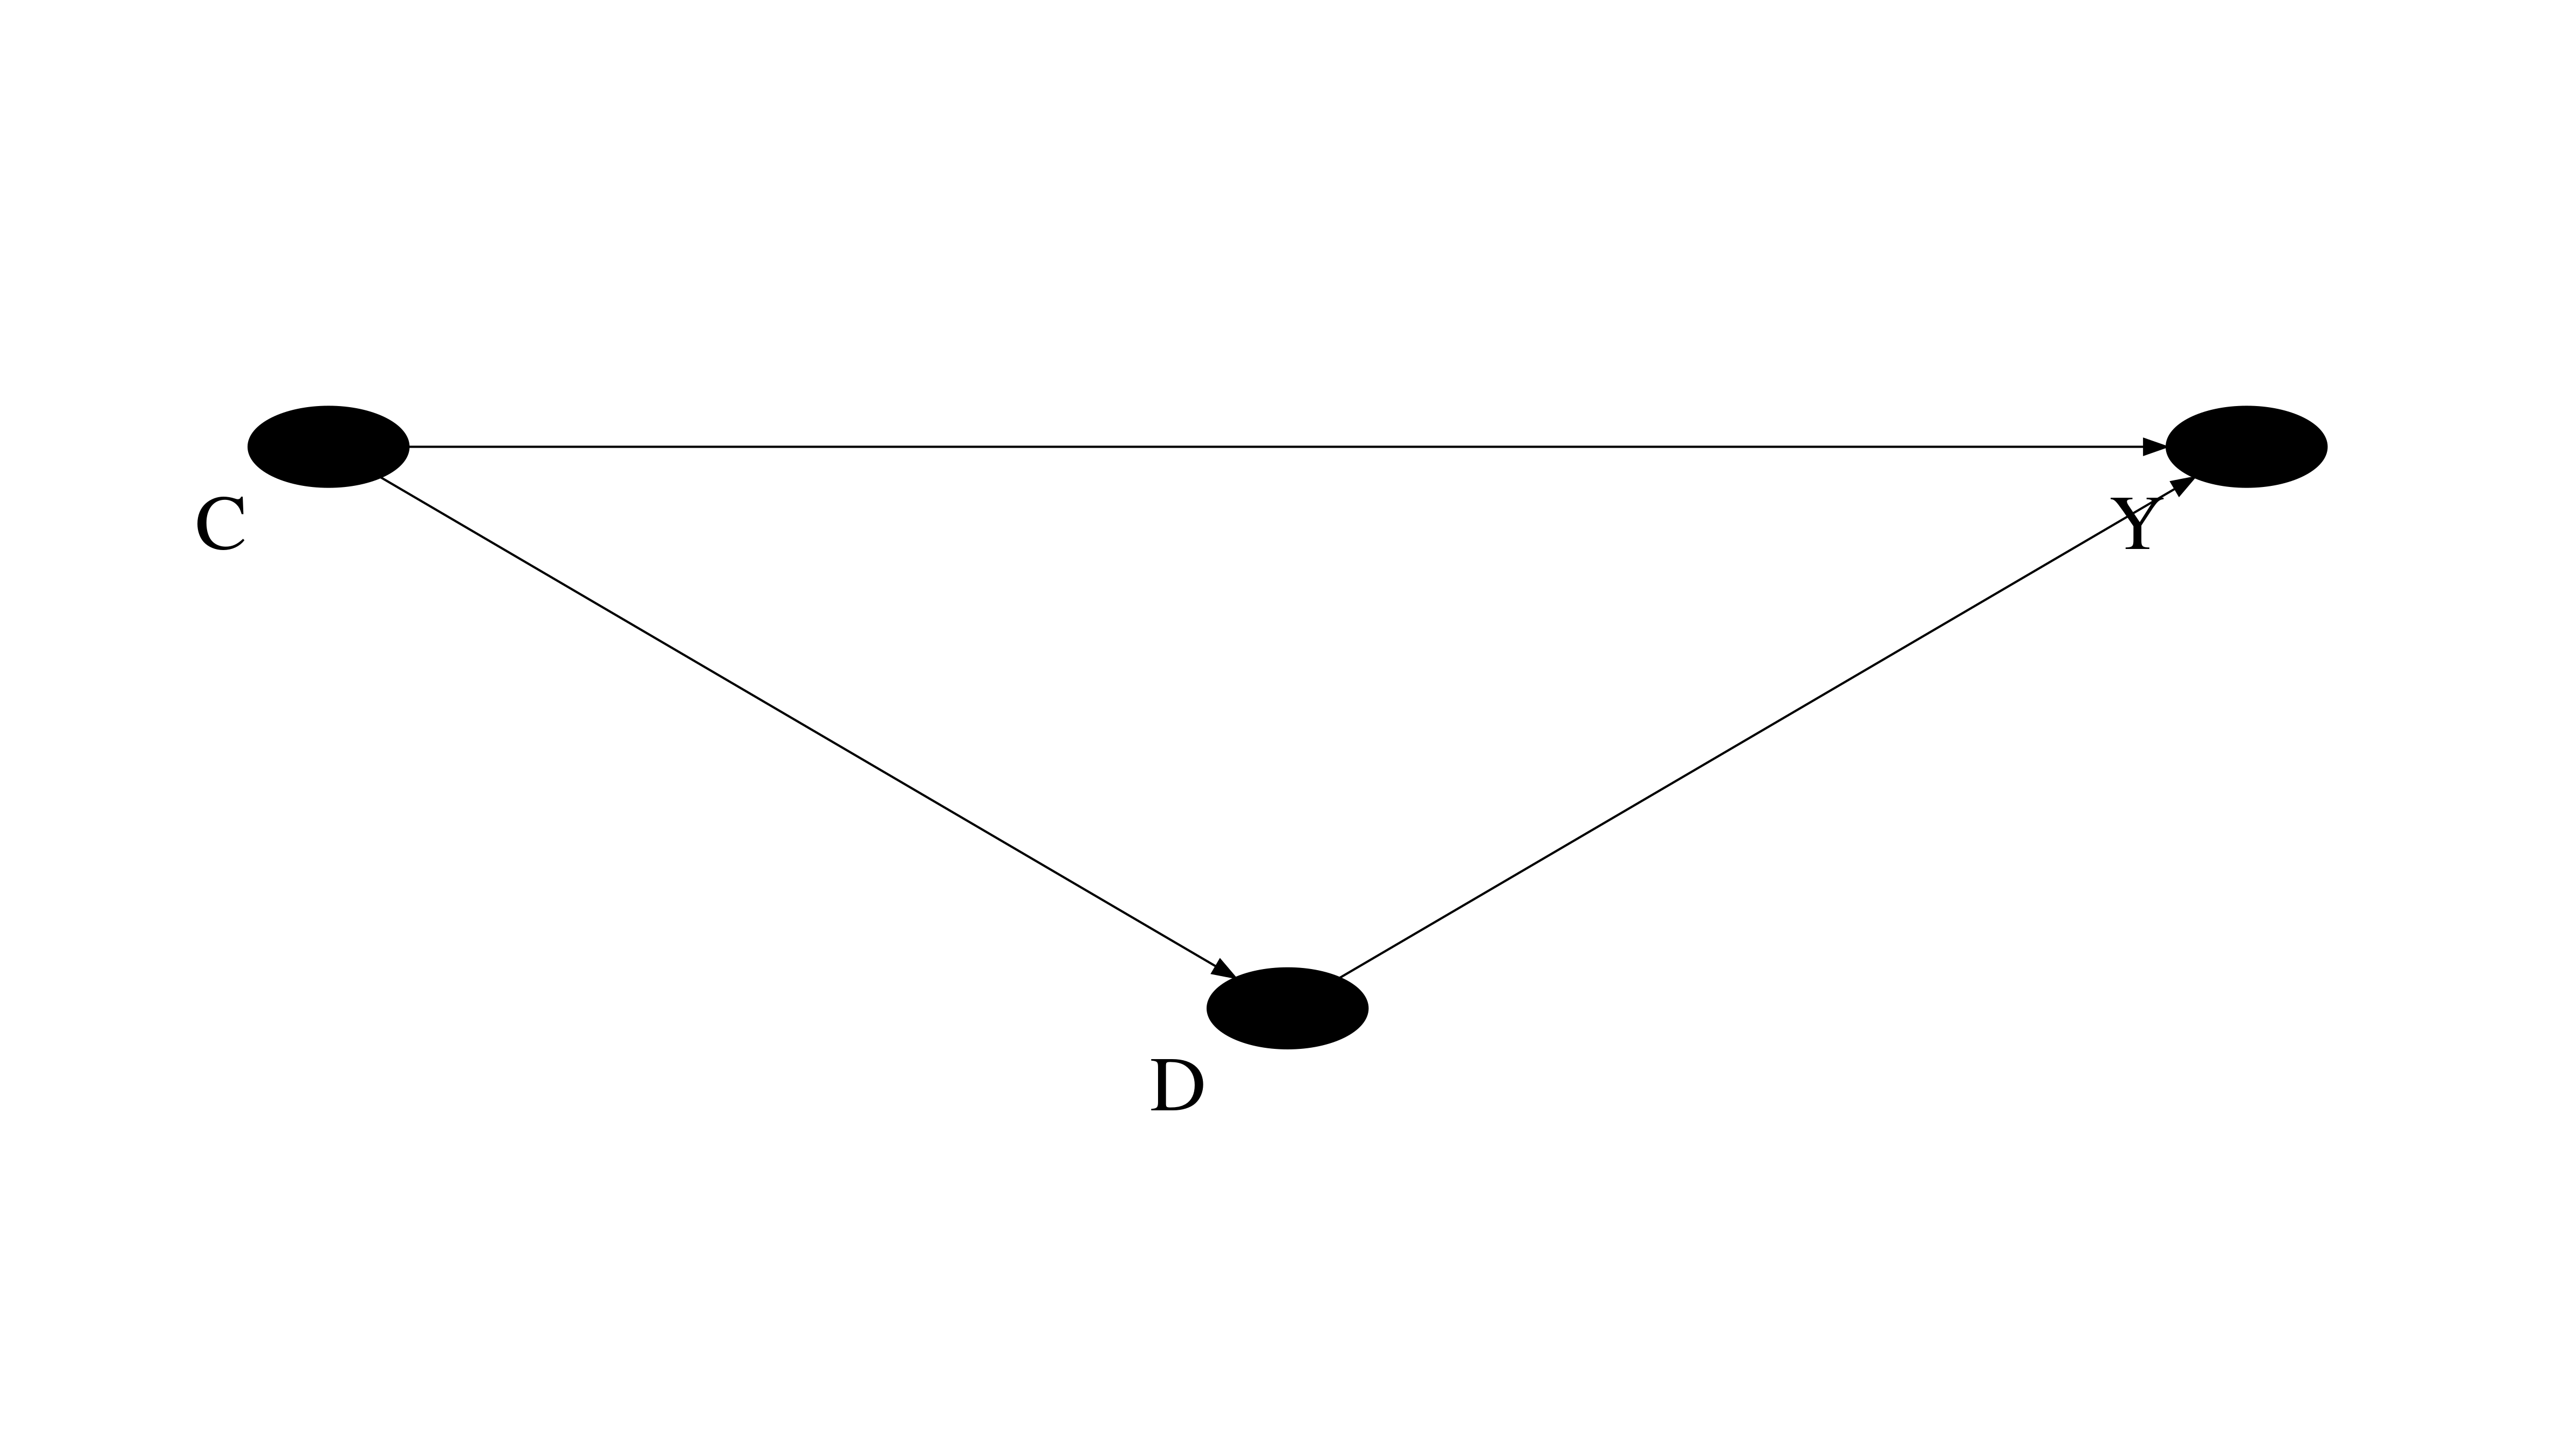

In [24]:
# This graphs is a simple illustration of a confounding variable.
g = get_graph()

g.add_node('C', label='', xlabel='C')
g.add_node('Y', label='', xlabel='Y')
g.add_node('D', label='', xlabel='D')


g.add_edge('D', 'Y')
g.add_edge('C', 'Y')
g.add_edge('C', 'D')

wrapping_up(g, 'fig-observed-confounding-variable.png' )

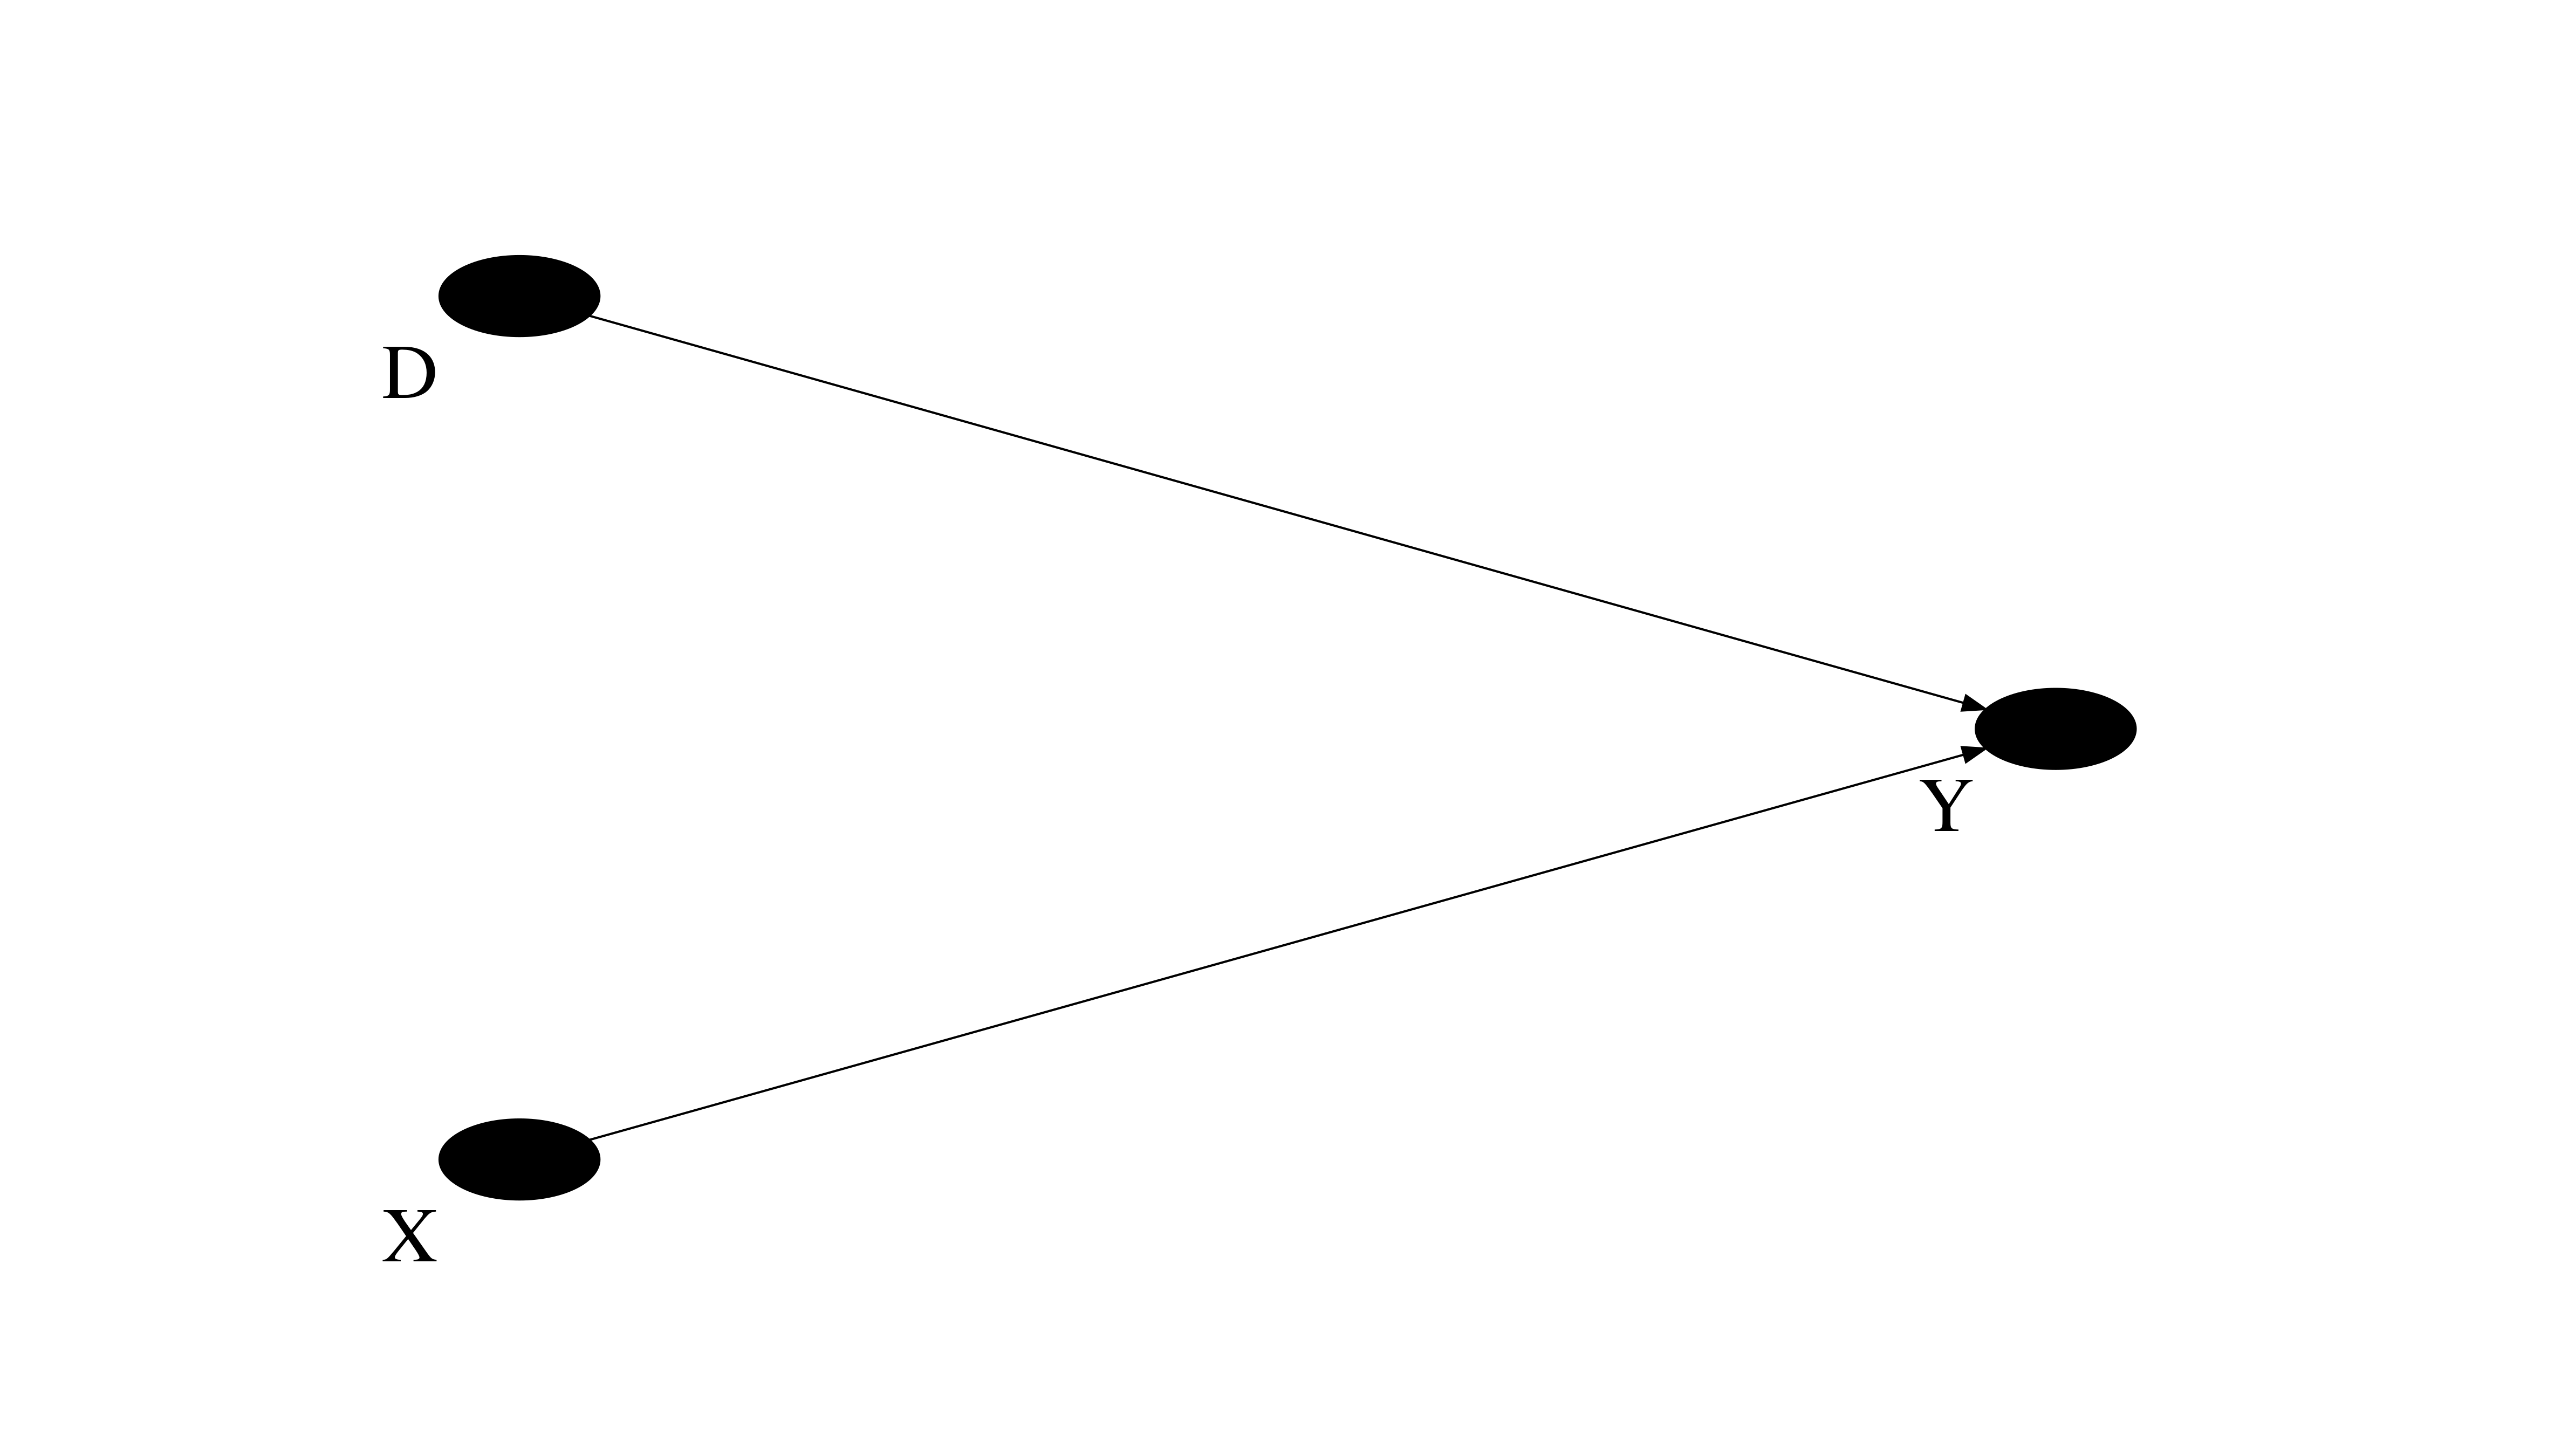

In [15]:
# This graphs illustrates the implicit setup behind the mean comparison 
# of the Lalonde dataset.
g = get_graph()

g.add_node('D', label='', xlabel='D')
g.add_node('Y', label='', xlabel='Y')
g.add_node('X', label='', xlabel='X')

g.add_edge('D', 'Y')
g.add_edge('X', 'Y')

wrapping_up(g, 'fig-implicit-lalonde.png' )

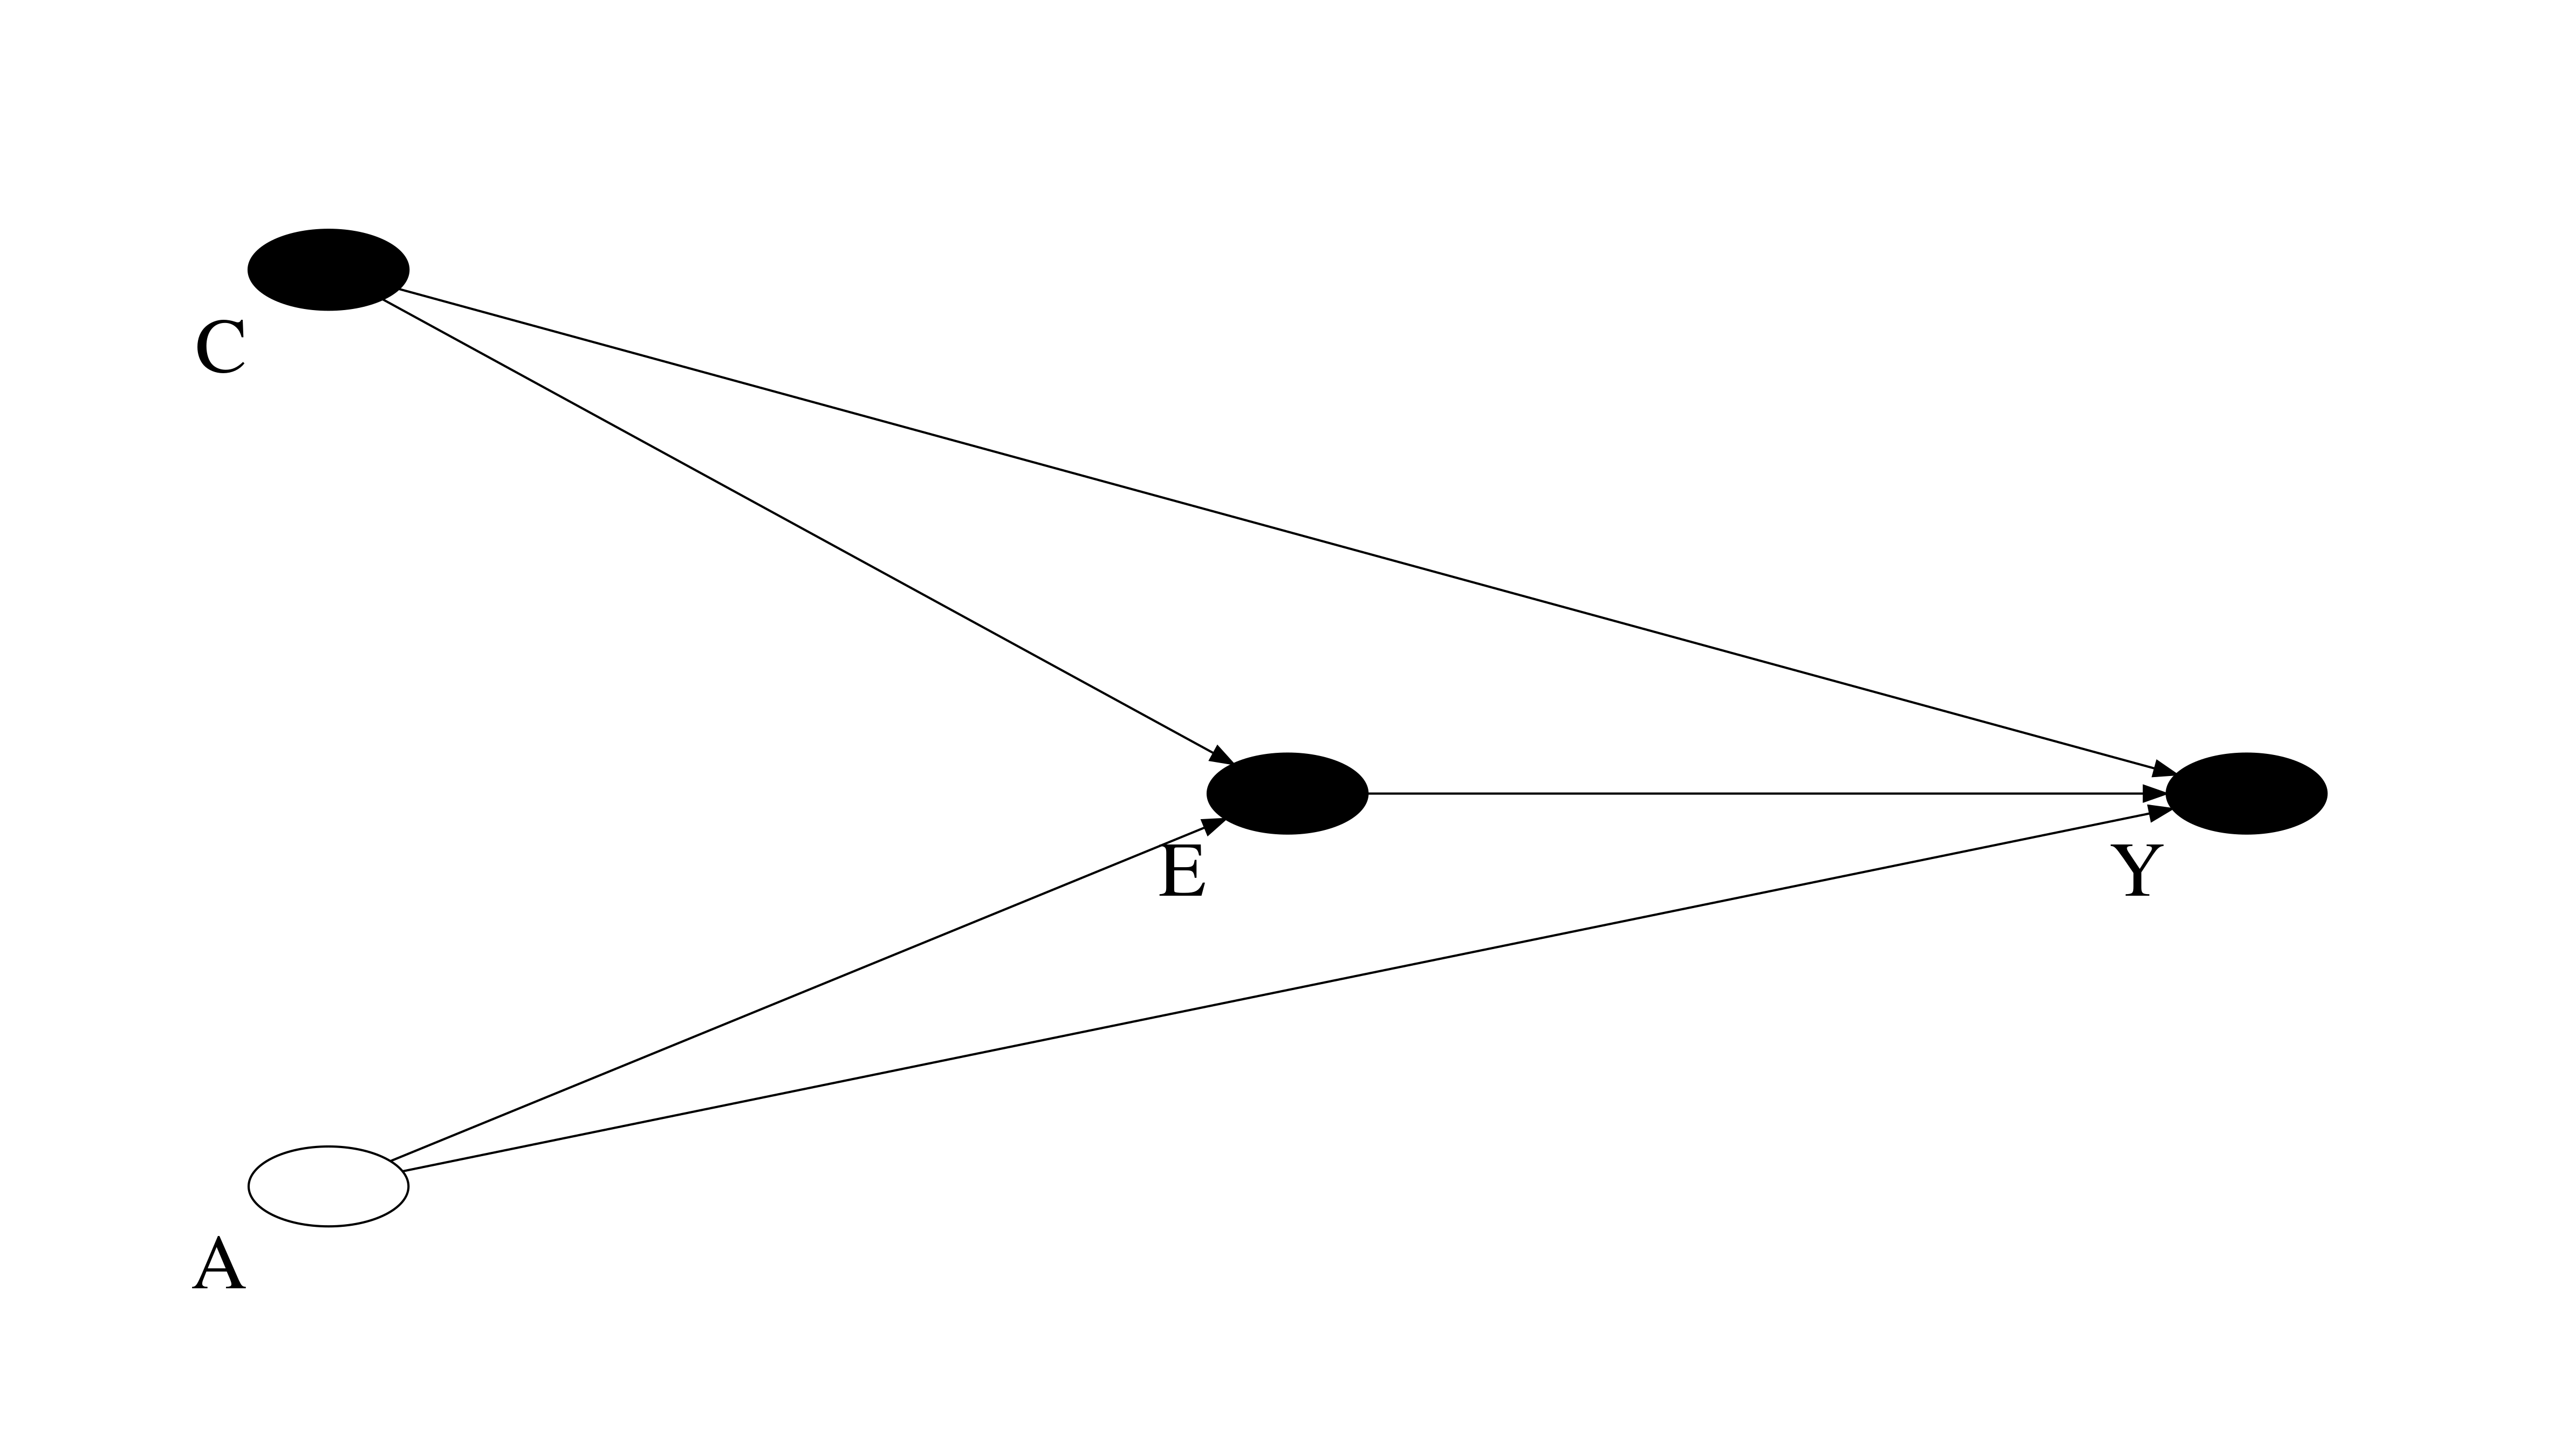

In [16]:
# This graphs shows the role of observed and unobserved confounders 
# in the economics of education.
g = get_graph()

g.add_node('C', label='', xlabel='C')
g.add_node('E', label='', xlabel='E')
g.add_node('A', label='', xlabel='A', fillcolor='white')
g.add_node('Y', label='', xlabel='Y')

g.add_edge('C', 'E')
g.add_edge('C', 'Y')
g.add_edge('A', 'E')
g.add_edge('A', 'Y')
g.add_edge('E', 'Y')

wrapping_up(g, 'fig-confounders-education.png' )

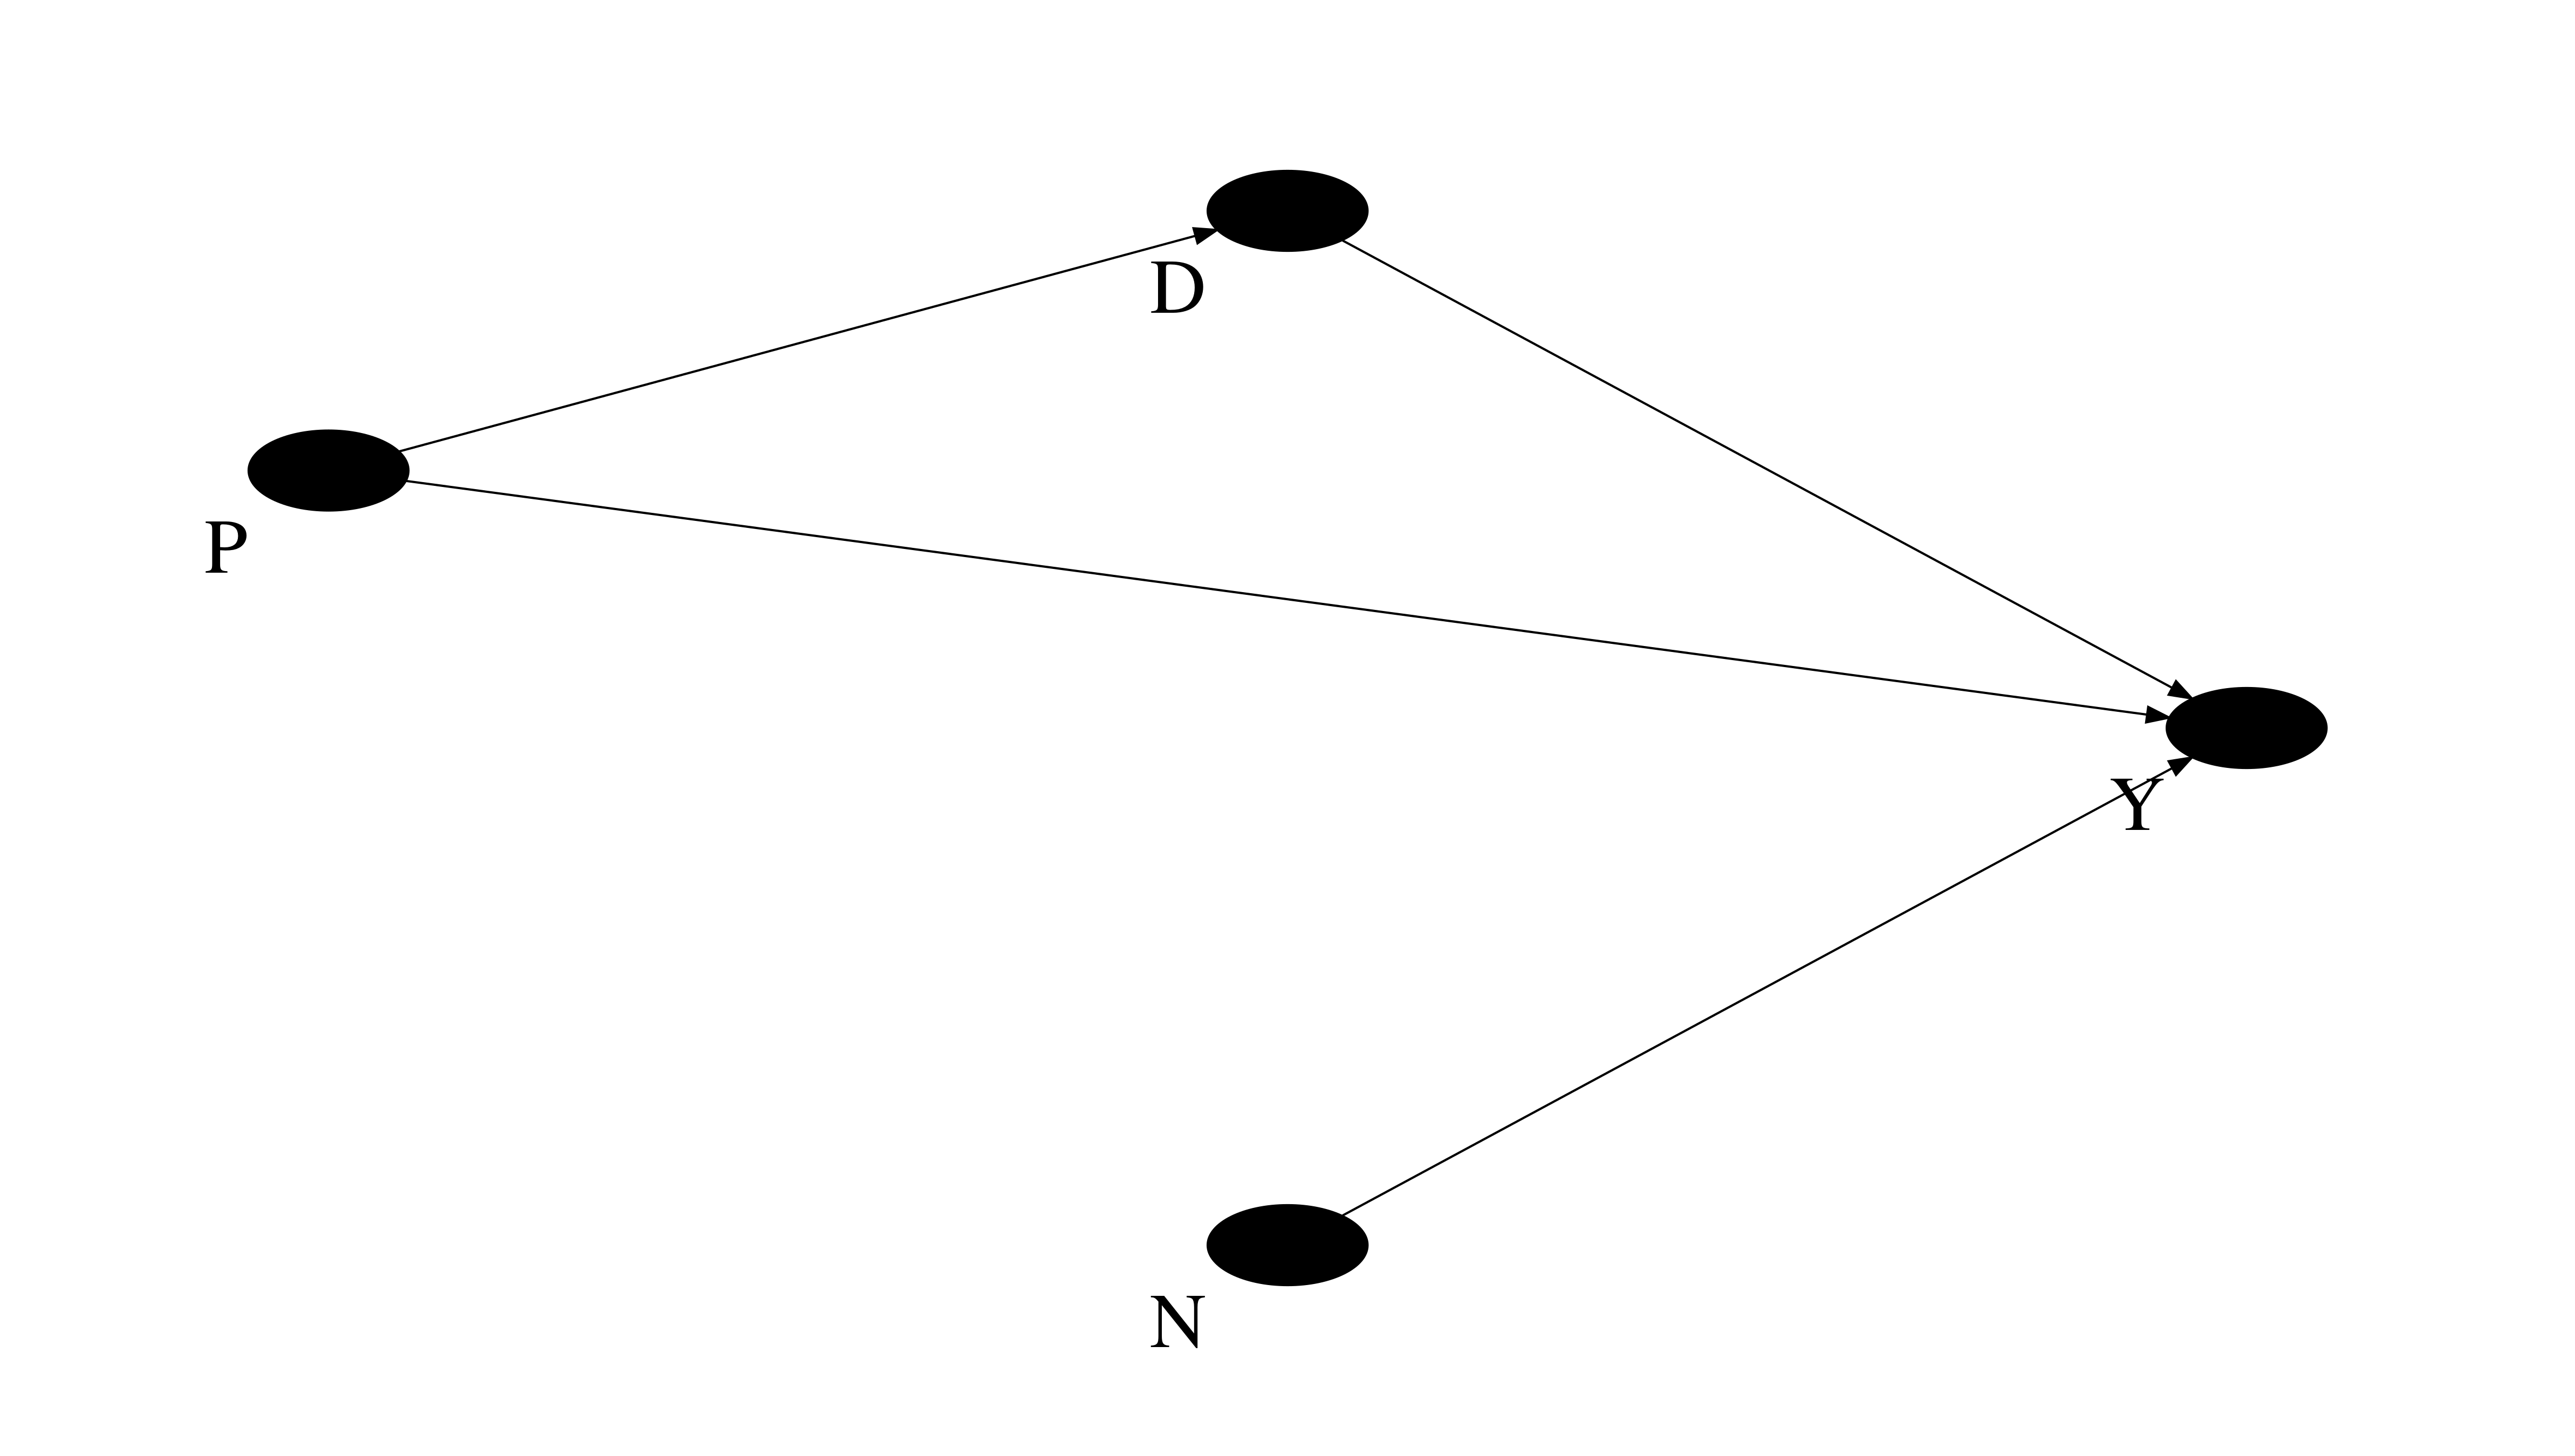

In [17]:
g = get_graph()


g.add_node('P', label='', xlabel='P')
g.add_node('D', label='', xlabel='D')
g.add_node('Y', label='', xlabel='Y')
g.add_node('N', label='', xlabel='N')


g.add_edge('P', 'D')
g.add_edge('P', 'Y')
g.add_edge('D', 'Y')
g.add_edge('N', 'Y')

wrapping_up(g, 'fig-equivalent-representations-standard.png' )

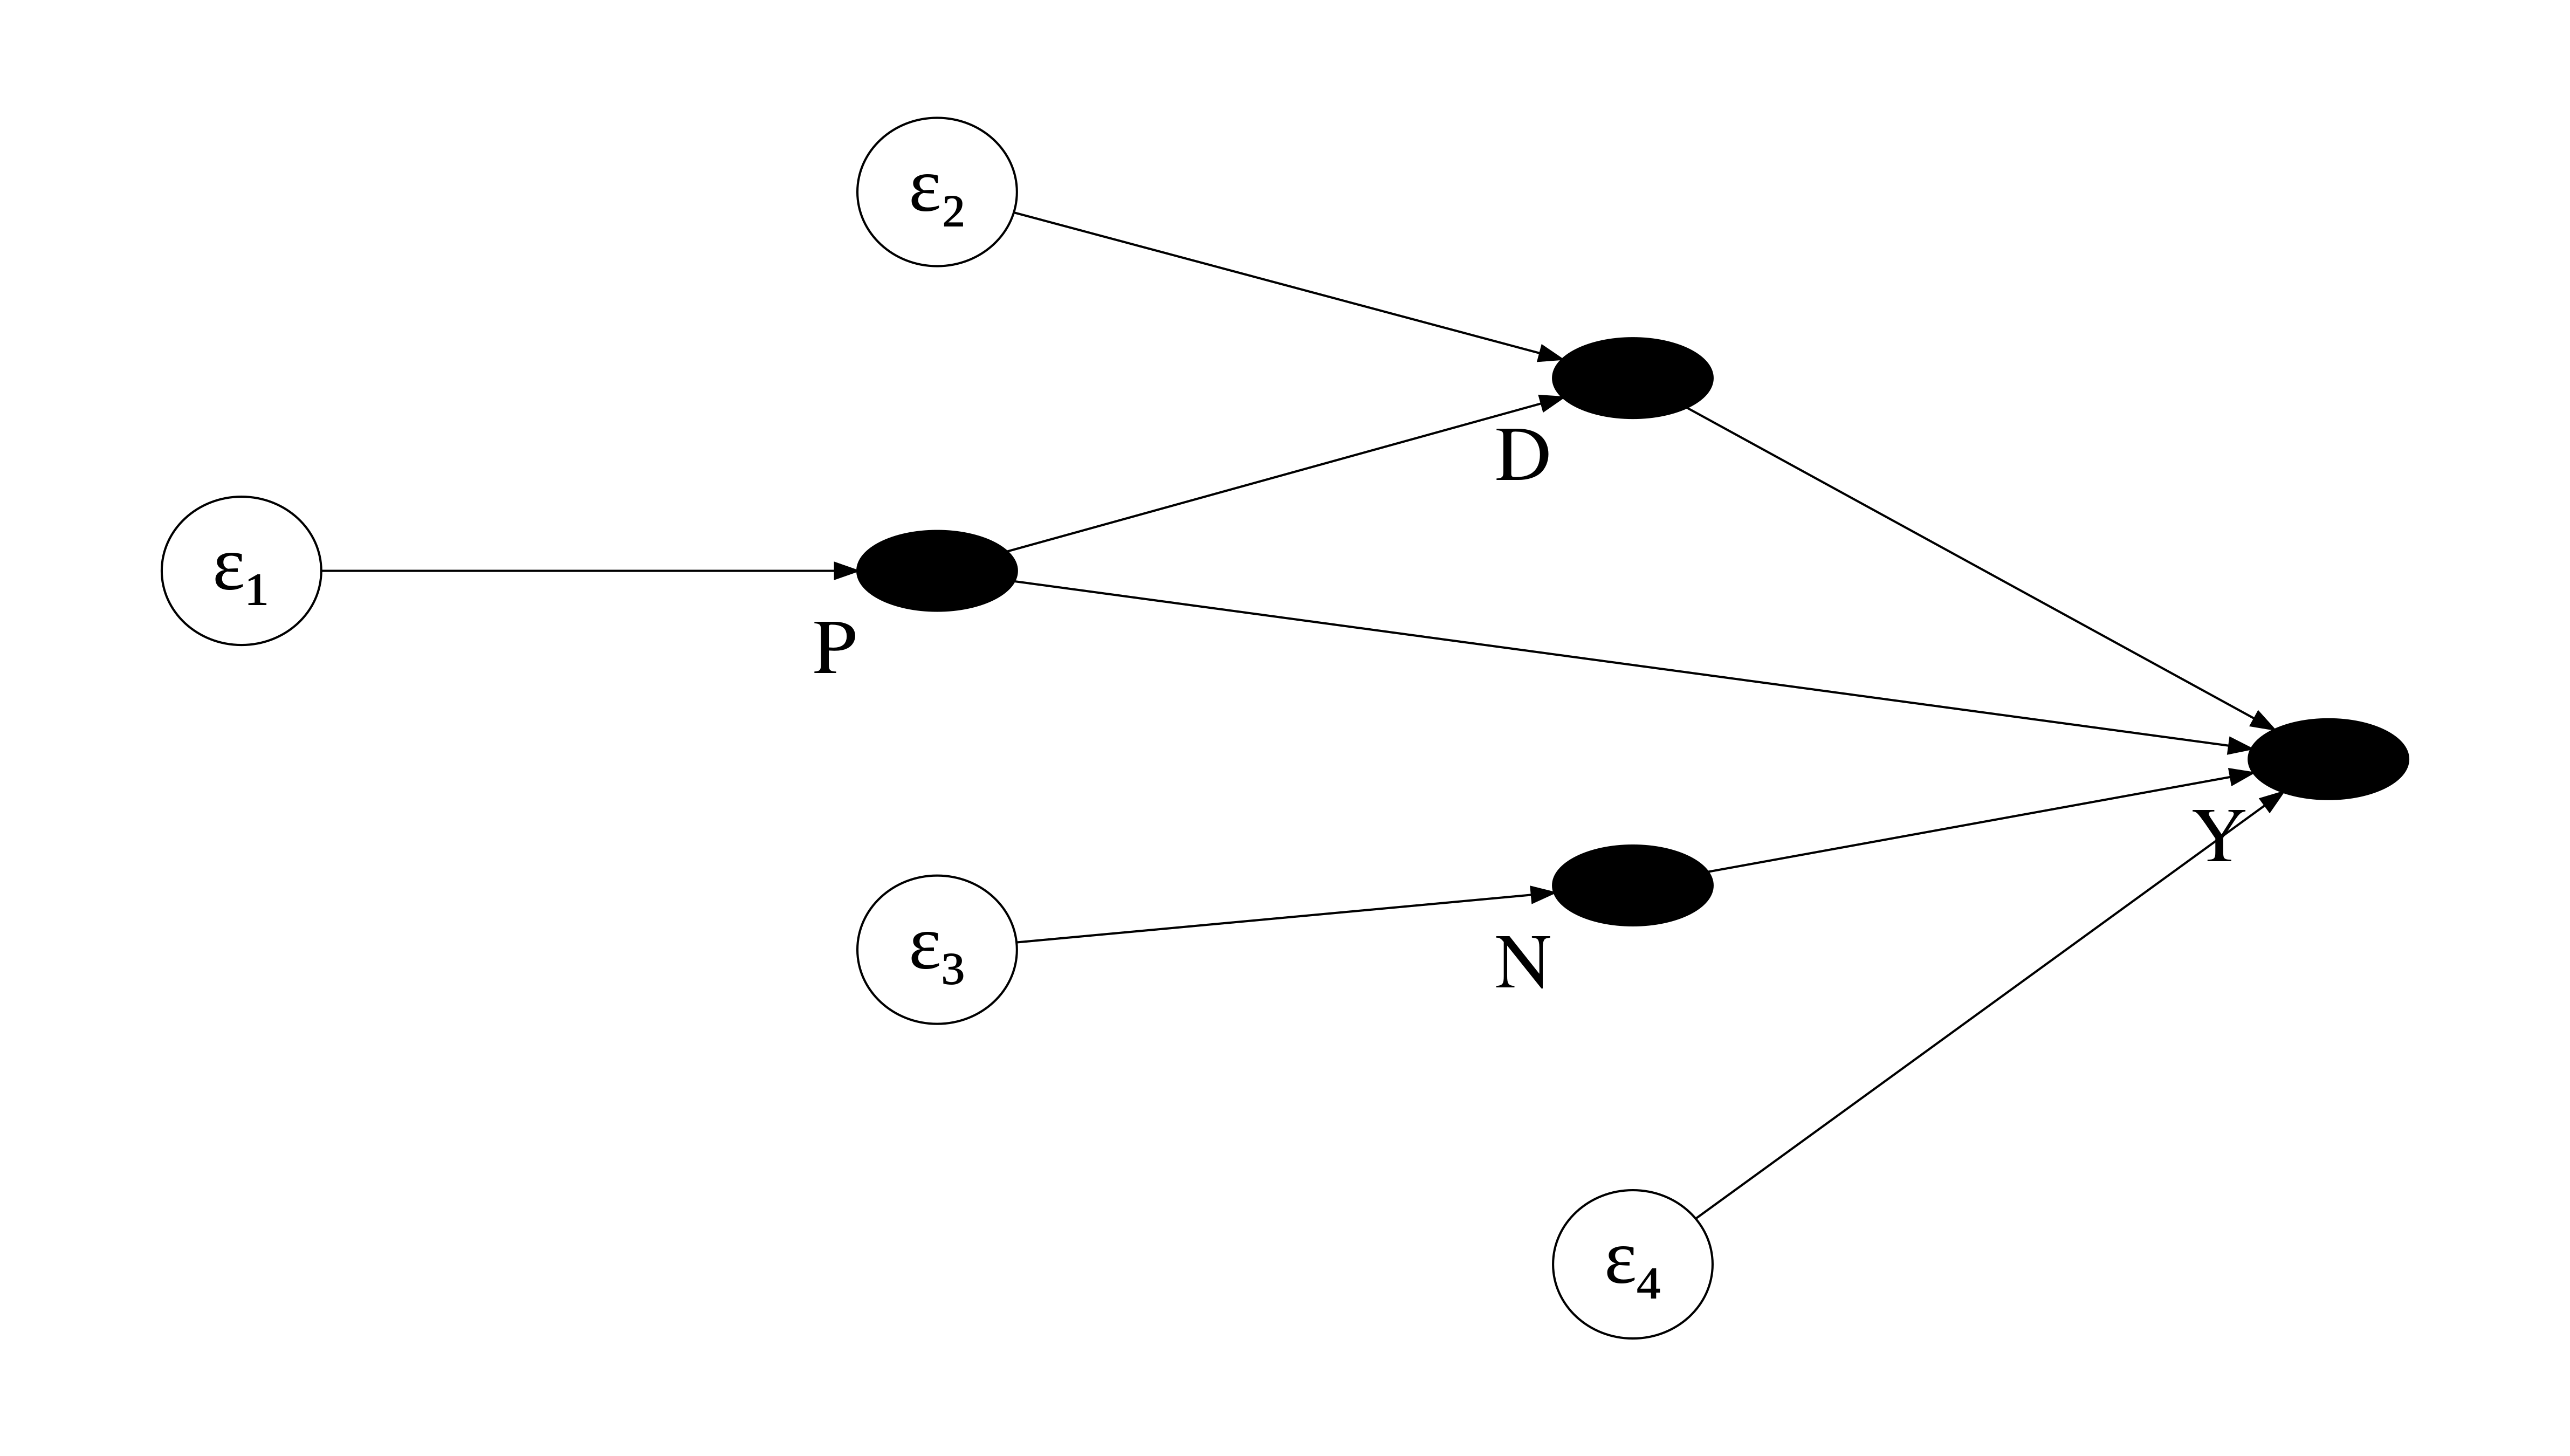

In [18]:
g = get_graph()

g.add_node('E_1', label='&#949;&#x2081;', fillcolor='white')
g.add_node('P', label='', xlabel='P')

g.add_node('E_2', label='&#949;&#x2082;', fillcolor='white')
g.add_node('D', label='', xlabel='D')

g.add_node('E_3', label='&#949;&#x2083;', fillcolor='white')
g.add_node('Y', label='', xlabel='Y')

g.add_node('E_4', label='&#949;&#x2084;', fillcolor='white')
g.add_node('N', label='', xlabel='N')


g.add_edge('E_1', 'P')
g.add_edge('E_2', 'D')
g.add_edge('E_4', 'Y')
g.add_edge('E_3', 'N')


g.add_edge('P', 'D')
g.add_edge('P', 'Y')
g.add_edge('D', 'Y')
g.add_edge('N', 'Y')

wrapping_up(g, 'fig-equivalent-representations-magnified.png' )